# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*)

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [ ]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

### Q.1.1
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/tmdb_5000_movies TMDL 2024.csv')
df

Mounted at /content/drive


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

View information about the dataset including datatypes and null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to estimate the missing values?

The columns with null values are homepage, overview, release_date, runtime and tagline. For homepage, overview and tagline it would be hard to estimate the missing values (e..g for homepage the majority of the values are missing, similiarly for tagline there is quite a lot of missing values and for overview it'd be hard to find the right overview since there's multiple different ones for each movie). However, for release_date and runtime, since there are only 1-2 missing values, it'd be possible to check which movies they refer to and simply google the release dates and runtime by myself.

### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [ ]:
df = df[["title", "overview", "genres"]]
df.info() # print out df info to verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [ ]:
df = df.dropna(subset=["overview"])
df = df.reset_index(drop=True)

# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [ ]:
np.random.seed(0)

def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs) # choose random entry
    return genre

# TODO: Fill in
def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))
    if label in unique_labels:
      out[unique_labels.index(label)] = 1
    return out

# save genres
processed_genres = []
for index, row in df.iterrows():
    processed_genres.append(process_genre_string(row['genres']))

# sort and remove duplicates to get vocabulary
unique_genres = sorted(list(set(processed_genres)))

# add to dataframe as new column
df["proc_genres"] = processed_genres

# one-hot encode genres
enocded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    enocded_labels.append(encode_labels(row['proc_genres'], unique_genres))

df["one_hot_genres"] = enocded_labels

100%|██████████| 4800/4800 [00:00<00:00, 19043.94it/s]


Verify that one-hot encodings are indeed as expected

In [ ]:
df["one_hot_genres"]

0       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
2       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
4795    [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
4796    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4797    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4798    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4799    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...
Name: one_hot_genres, Length: 4800, dtype: object

### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

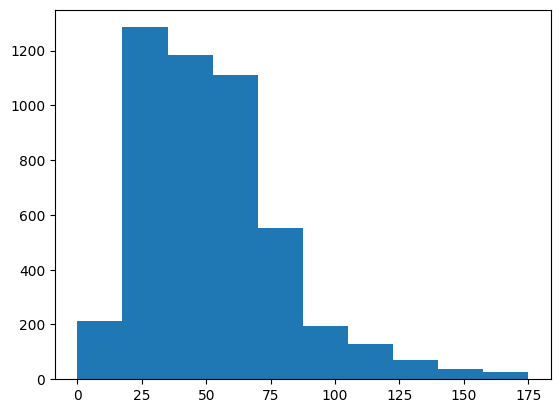

175
0


In [ ]:
import re
def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

processed_overviews = []

# loop over df, remove punctuation, make words lowercase and add it to a new column
for i, row in df.iterrows():
  removed_overview = remove_punctuation(row["overview"])
  processed_overviews.append(removed_overview)


df["proc_overview"] = processed_overviews

# get the word lengths of each overview and store it in a list

overview_lens = [len(overview.split()) for overview in processed_overviews]
df['overview_lens'] = overview_lens


# for the sake of simplicity, add these values as a column to the df
df["overview_len"] = overview_lens
plt.hist(overview_lens)
plt.show()

print(df['overview_len'].max())
print(df['overview_len'].min())

**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

The shortest overview has word length of 0 and the longest has the word lenghts of 175.

One method to determine which valuea are outliers and thus which ones should be dropped is to drop those that are further away from the median than 2*standard deviation.

### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [ ]:
token_len = 15 # number of words
# only select rows where overview len is more than or equal to token_len
df = df[df['overview_len'] >= token_len]

# split each proc_overview into a list of words, select the first token_len words,
# and add the list of words back into df["proc_overview"]
df["proc_overview"] = df["proc_overview"].apply(lambda x: x[:token_len])

# print to verify
df

<ipython-input-11-3bd96b16912e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["proc_overview"] = df["proc_overview"].apply(lambda x: x[:token_len])


,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_lens,overview_len
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",In the 22nd cen,28,28
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",Captain Barboss,34,34
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",A cryptic messa,41,41
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Following the d,65,65
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",John Carter is,55,55
...,...,...,...,...,...,...,...,...
4794,Cavite,"Adam, a security guard, travels from Californi...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Adam a security,115,115
4795,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",El Mariachi jus,62,62
4797,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Signed Sealed D,73,73
4798,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],Unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",When ambitious,65,65


### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [ ]:
# hint: store all words for all movies in a set, change it to a list and sort
total = set()

for word in df["proc_overview"]:
  word_sep= word.split()
  total.update(word_sep)

vocab_list = sorted(list(total))
vocab_len = len(vocab_list)
print(vocab_len)

5225
Vocabulary list: ['0', '007', '1', '10', '100', '101', '11', '11000', '117', '11yearold', '12', '121', '1250', '12year', '12yearold', '13year', '13yearold', '1429', '14year', '15th', '15yearold', '16', '16th', '16yearold', '17', '17th', '17yea', '17yearold', '18', '180', '1818', '1820s', '1839', '1841', '1845', '1850', '1862', '1863', '187', '1870s', '1882', '189', '1890', '1890s', '18th', '18yearol', '19', '1905', '1910', '1914', '1919', '1920s', '1921', '1925', '1927', '193', '1930', '1931', '1933', '1937', '194', '1940s', '1941', '194344', '1944', '1947', '1950', '1950s', '1951', '1954', '1955', '1957', '1958', '1959', '1960s', '1962', '1964', '1965', '1966', '1967', '1968', '1970s', '1971', '1972', '1973', '1974', '1976', '1977', '1978', '1979', '198', '1980', '1980s', '1982', '1985', '1987', '1988', '199', '1990', '1991', '1993', '1996', '1997', '19th', '19thce', '19yearold', '2', '20', '200', '2000', '2002', '2003', '2009', '201', '2012', '2013', '2014', '2016', '2017', '201

### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [ ]:

encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = np.zeros(vocab_len) # set of encodings for this overview
    for word in row["proc_overview"]:
        word_encode = encode_labels(word, vocab_list) # get encoding for this word
        sentence_encode += word_encode# sum over axis=1
    encoded_labels.append(sentence_encode)

df["one_hot_overview"] = encoded_labels
df['one_hot_overview'] # print to verify

100%|██████████| 4707/4707 [00:10<00:00, 429.57it/s]
<ipython-input-17-aa3e71648d8b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["one_hot_overview"] = encoded_labels


0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
4794    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4795    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4797    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4798    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4799    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: one_hot_overview, Length: 4707, dtype: object

**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

8 * 4707 = 37 656 bytes

# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

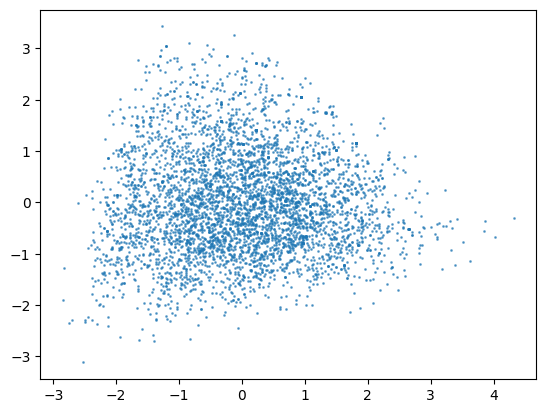

In [ ]:
# import PCA decomposition class from sklearn
from sklearn.decomposition import PCA

# we did exactly this in the lecture notebook
overview_arrays = np.array(df['one_hot_overview'].values.tolist())
pca = PCA(n_components=2)
overview_pca = pca.fit_transform(overview_arrays)
plt.scatter(overview_pca[:, 0], overview_pca[:, 1], alpha=0.6, s=1)
plt.show()

**Q3.2** Do you see any interpretable structure in the above plot ("interpretable" $\rightarrow$ the patterns are explainable).

No, there don't appear to be any

**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
total_variance_explained = np.sum(explained_variance_ratio)

variance_lost = 1 - total_variance_explained
print(variance_lost)

0.7868934684631769


79% was lost

**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

In [ ]:
print(df['one_hot_overview'].values.shape)
one_hot_overview_array = np.array(df['one_hot_overview'].values.tolist())
print(one_hot_overview_array.shape)

(4707,)
(4707, 5225)


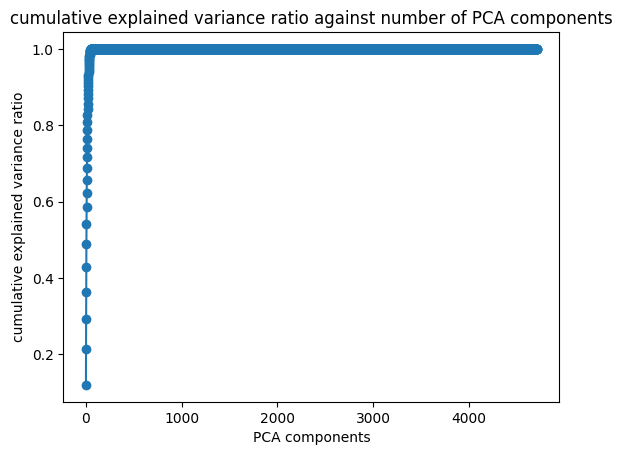

In [ ]:
# Set up PCA object with the desired number of components
n_components = min(one_hot_overview_array.shape)
pca = PCA(n_components=n_components)
# fit transform one_hot_overview encodings
labels_pca = pca.fit_transform(one_hot_overview_array)
# get explained variance ratio from object, store it in a list
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
# set up y label, x label, title
plt.xlabel('PCA components')
plt.ylabel('cumulative explained variance ratio')
plt.title('cumulative explained variance ratio against number of PCA components')
plt.show()

**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [ ]:
x = np.argmax(cumulative_variance_ratio >= 0.8) + 1
print(x)

16


I need 16 principal components to explin 80% of the total variance

**Q3.6** Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called `overview_pca` in the dataframe.

In [ ]:
n_dims = x
one_hot_overview_array = np.vstack(df['one_hot_overview'].values)
pca = PCA(n_components=n_dims)
labels_pca = pca.fit_transform(one_hot_overview_array)
df["overview_pca"] = labels_pca.tolist()

# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

In [ ]:
# import KMeans class
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = kmeans = KMeans(n_clusters=20, random_state=100)

# fit model
kmeans.fit(df['overview_pca'].tolist())

y_preds = kmeans.predict(df['overview_pca'].tolist())
df["cluster_kmeans"] = y_preds

# print out elements of cluster 0
cluster_0 = df[df["cluster_kmeans"] == 0]
print(cluster_0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                    title  \
5                            Spider-Man 3   
22    The Hobbit: The Desolation of Smaug   
97                          Shin Godzilla   
110                          Pearl Harbor   
159                            Spider-Man   
...                                   ...   
4735                                   Pi   
4747                          The Dirties   
4748                             Gabriela   
4786                                Clean   
4793                               Primer   

                                               overview  \
5     The seemingly invincible Spider-Man goes up ag...   
22    The Dwarves, Bilbo and Gandalf have successful...   
97    From the mind behind Evangelion comes a hit la...   
110   The lifelong friendship between Rafe McCawley ...   
159   After being bitten by a genetically altered sp...   
...                                                 ...   
4735  The debut film from Darren Aronofsky in 

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

It looks alright to me, it seems like mostly adventure movies, whether action or fantasy or science fiction. Spiderman and spiderman-3 definitely go well together, and I think those match with e.g. godzilla. But I feel like e.g. life of pi is a bit out of place here.

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

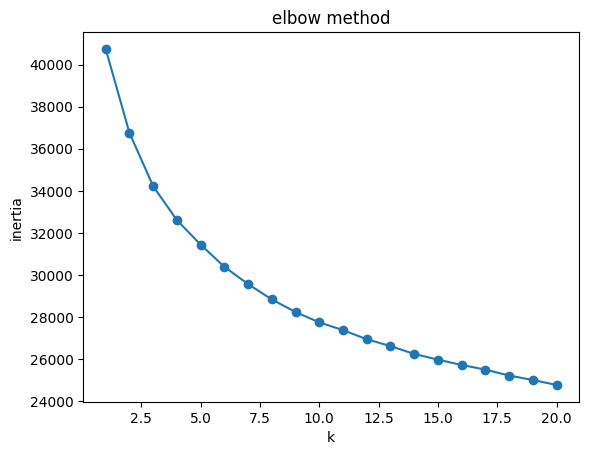

In [ ]:

inertia_values = []
cluster_sizes = range(1, 21)

for k in cluster_sizes:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(labels_pca)
    inertia_values.append(kmeans.inertia_)


plt.plot(cluster_sizes, inertia_values, marker='o')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('elbow method')
plt.show()

I'd say something around 5 would be suitable

# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=20, random_state=42)
gmm.fit(labels_pca)
cluster_labels = gmm.predict(labels_pca)
df["cluster_gmm"] = cluster_labels
chosen_cluster = 0
cluster_elements = df[df["cluster_gmm"] == chosen_cluster]
print(cluster_elements)


                                                  title  \
53    Indiana Jones and the Kingdom of the Crystal S...   
90                                    The Polar Express   
124                                              Frozen   
132                                 Wrath of the Titans   
155                              Fun with Dick and Jane   
...                                                 ...   
4747                                        The Dirties   
4749                                     Tiny Furniture   
4751                                      The Naked Ape   
4753                                The Call of Cthulhu   
4777                                        Dutch Kills   

                                               overview  \
53    Set during the Cold War, the Soviets – led by ...   
90    When a doubting young boy takes an extraordina...   
124   Young princess Anna of Arendelle dreams about ...   
132   A decade after his heroic defeat of the monstr...

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

It seems a bit weird as it puts Call of Cthulu together with Frozen. I preferred k-means' cluster more. Howeverm it does also put Cthulu & Indiana Jones together which makes a bit more sense.

**Q4.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

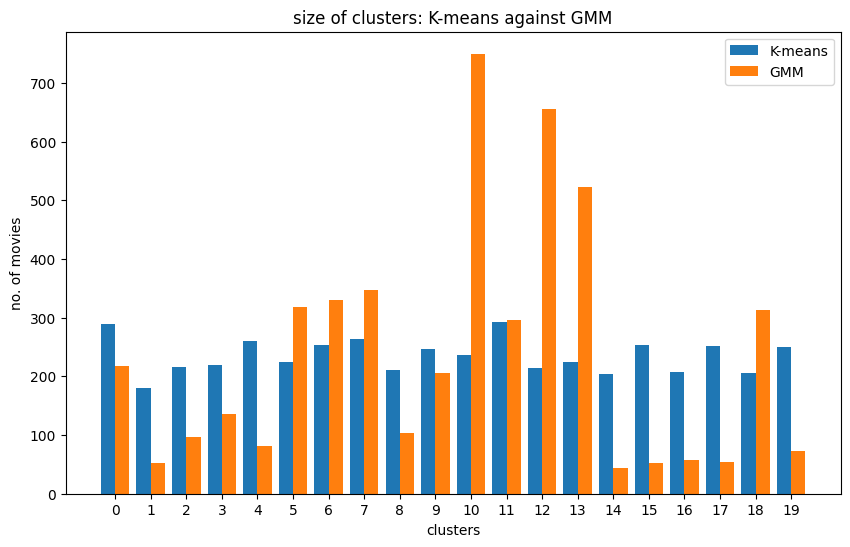

In [ ]:
# Create an array for the x-axis positions
cluster_counts = df['cluster_kmeans'].value_counts().sort_index()
gmm_cluster_counts = df['cluster_gmm'].value_counts().sort_index()
x = range(len(cluster_counts))
# Plotting the bars
plt.figure(figsize=(10, 6))
plt.bar(x, cluster_counts, width=0.4, align='center', label='K-means')
plt.bar([i + 0.4 for i in x], gmm_cluster_counts, width=0.4, align='center', label='GMM')
# Add labels, title, and legend
plt.xlabel('clusters')
plt.ylabel('no. of movies')
plt.title('size of clusters: K-means against GMM')
plt.xticks([i + 0.2 for i in x], x)
plt.legend()
plt.show()

**Q4.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

Yes, k-means' cluters are definitely more uniform. It might be bcause it assigns data to the closest centroid and tries to minimise the sum-of-squares in the clusters.

# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [ ]:
prev_watch = "Avatar"

cluster_kmeans = cluster_kmeans = df[df['title'] == prev_watch]['cluster_kmeans'].values[0]
cluster_gmm = df[df['title'] == prev_watch]['cluster_gmm'].values[0]

# print out similar movies
similar_movies_kmeans = df[df['cluster_kmeans'] == cluster_kmeans]['title'].values
print("Movies similar to Avatar based on K-means clustering:")
print(similar_movies_kmeans)

print(' ')

similar_movies_gmm = df[df['cluster_gmm'] == cluster_gmm]['title'].values
print("\nMovies similar to Avatar based on GMM clustering:")
print(similar_movies_gmm)

Movies similar to Avatar based on K-means clustering:
['Avatar' 'The Avengers' 'Battleship' 'Skyfall' 'Alice in Wonderland'
 'The Good Dinosaur' 'Jupiter Ascending' 'Monsters vs Aliens'
 'Transformers' 'Armageddon' 'Rise of the Guardians' 'Hulk' 'After Earth'
 "Ocean's Twelve" 'Home on the Range' 'Epic' 'Blood Diamond' 'Hercules'
 'Black Hawk Down' 'Finding Nemo' 'Jurassic Park III' 'Tropic Thunder'
 'The Bourne Supremacy' "Ocean's Thirteen" 'Space Jam'
 'Journey 2: The Mysterious Island' 'Killers' 'Monster House'
 'Star Trek: Insurrection' 'The Legend of Hercules' 'We Are Marshall'
 'Days of Thunder' 'The Horse Whisperer' 'Coraline' 'Alien: Resurrection'
 'Mercury Rising' 'The Spirit' 'Superman' 'The Forbidden Kingdom'
 'The Hunted' 'Elizabeth: The Golden Age' 'Curious George'
 'The Story of Us' 'The International'
 'The Messenger: The Story of Joan of Arc' 'Zoolander 2'
 'Street Fighter: The Legend of Chun-Li'
 'Indiana Jones and the Last Crusade' 'Rat Race' 'Taken 3'
 'The Flintston

**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

I think they're nice to look at for inspiration, they definetly have some movies that I feel like someone who lked Avatar could like.

**Q6.3** How would you try making the recommender systems better?

Maybe limit the amount of movies shown since it is a bit overwhelming? And an option to click on the movie to see the summary + maybe the movie's poster for some visuals:)

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

Maybe check recommendations for all the films, check which recommendations overlap and show those first?

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [ ]:
def cosine_sim(v1, v2):
    return np.dot(v1, v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

# get overview_pca encoding of previously watched film
prev_watch_enc = df[df['title'] == prev_watch]['overview_pca'].iloc[0]

sims = [] # set up place to store similarities
for i, row in df.iterrows():
  movie = row['overview_pca']
  sims.append(cosine_sim(prev_watch_enc, movie))

df["cos_sim_to_avatar"] = sims
df = df.sort_values(by="cos_sim_to_avatar", ascending=False) # sort df
df # print to verify

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_lens,overview_len,one_hot_overview,overview_pca,cluster_kmeans,cluster_gmm,cos_sim_to_avatar
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",In the 22nd cen,28,28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7011015671776692, -0.8455441507880365, 0.17...",2,13,1.000000
3944,Love's Abiding Joy,The continued Westward journey of settlers Mis...,"[{""id"": 10770, ""name"": ""TV Movie""}, {""id"": 28,...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",The continued W,159,159,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5927934824798502, 0.152097975035166, 0.5576...",13,5,0.793035
4149,The Torture Chamber of Dr. Sadism,"In the Olden Tymes, Count Regula is drawn and ...","[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 27, ""...",Mystery,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",In the Olden Ty,48,48,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9090620040564299, -0.45690647173112886, 0.2...",6,13,0.791355
16,The Avengers,When an unexpected enemy emerges and threatens...,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",Science Fiction,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",When an unexpec,47,47,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9345430207085101, -1.3891745133177276, -0.5...",2,5,0.779176
634,The Matrix,"Set in the 22nd century, The Matrix tells the ...","[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",Science Fiction,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Set in the 22nd,32,32,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9722129844552796, -0.7370895222142639, 1.08...",13,13,0.778260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,A Guy Thing,Paul Morse is a good guy. When his friends thr...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",Comedy,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Paul Morse is a,86,86,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.8121883721825625, -0.12187703421675947, -0...",8,6,-0.675600
3633,Zero Effect,Daryl Zero is a private investigator. Along wi...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",Daryl Zero is a,69,69,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.5517212802271335, -0.07739874210134648, -0...",5,6,-0.686235
1135,Lord of War,"Yuri Orlov is a globetrotting arms dealer and,...","[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",Yuri Orlov is a,53,53,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.2423645425018144, 0.6507245066584886, 0.21...",10,6,-0.686859
2032,Shadowlands,"C.S. Lewis, a world-renowned writer and profes...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",Drama,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",CS Lewis a worl,18,18,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.4297232008924289, 0.42061691326653494, -0....",4,13,-0.700029


*Your text answer here*

# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [ ]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))

3765 942


## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

In [59]:
train_scores = []
test_scores = []
fit_times = []
inf_times = []

def train_and_eval(model, train_X, train_y, test_X, test_y):
    """ Trains, times and evaluates a given instantiated model on data """

    start = perf_counter()               # check current (start) time
    model = model.fit(train_X, train_y)               # perform some code that you want to time
    end = perf_counter()                 # check current (end) time
    fit_time = end-start                 # compute interval

    # time inference over train score
    start = perf_counter()
    train_score = model.score(train_X, train_y)
    end = perf_counter()
    train_score_time = end-start

    # time inference over test score
    start = perf_counter()
    test_score = model.score(test_X, test_y)
    end = perf_counter()
    test_score_time = end-start
    train_scores.append(train_score)
    test_scores.append(test_score)
    fit_times.append(fit_time / n_train)
    inf_times.append(train_score_time / n_train)

    return train_score, test_score, fit_time, train_score_time, test_score_time

train_overviews = df_train['overview'].apply(lambda x: ' '.join(x.split()[:10])).tolist()
test_overviews = df_test['overview'].apply(lambda x: ' '.join(x.split()[:10])).tolist()

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_overviews)
X_test = vectorizer.transform(test_overviews)

y_train = df_train['proc_genres']
y_test = df_test['proc_genres']

# Define and train the logistic regression model
log_reg_model = LogisticRegression(max_iter=1000)
train_score, test_score, fit_time, train_score_time, test_score_time = train_and_eval(log_reg_model, X_train, y_train, X_test, y_test)

# Print the evaluation metrics
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")
print(f"Mean training time: {fit_time} seconds")
print(f"Mean inference time (train set): {train_score_time} seconds")
print(f"Mean inference time (test set): {test_score_time} seconds")

Train score: 0.9792828685258964
Test score: 0.23142250530785563
Mean training time: 12.839316328001587 seconds
Mean inference time (train set): 0.012467597998693236 seconds
Mean inference time (test set): 0.004620087000148487 seconds


Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

I made direct use of the train_and_eval function from assignment 2 by copying it into this question. I decided to use logistic regression since it is a simple model we've learned during the lectures and I am already familiar with is. I used the train/test_overview variables to store the first 10 words of the overviews. Then, i used the CountVectorizer function to conver the parts of the overviews into vectors and defined the x values using it. Finally, I used the logistic regression function to try and guess the movies and I then made use of the train_and_eval function to determine how well the model did.

# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)